              unit,na_item,geo\time   Country   2005   2006   2007   2008  \
0   PC_EU27_2020_MPPS_CP,NLPR_HW,AT   Austria  117.5  117.8  116.8  116.3   
1  PC_EU27_2020_MPPS_CP,NLPR_PER,AT   Austria  122.2  121.3  119.5  118.5   
2   PC_EU27_2020_MPPS_CP,NLPR_HW,BE   Belgium  142.8  139.9  138.0  136.2   
3  PC_EU27_2020_MPPS_CP,NLPR_PER,BE   Belgium  133.6  132.1  130.4  127.9   
4   PC_EU27_2020_MPPS_CP,NLPR_HW,BG  Bulgaria   37.6   37.5   38.8   39.5   

    2009   2010   2011   2012   2013   2014   2015   2016   2017   2018  \
0  117.5  115.6  115.1  118.0  117.9  118.1  119.7  119.5  117.5  117.8   
1  118.3  115.7  115.6  118.1  117.4  117.0  117.4  117.8  115.8  116.5   
2  136.8  138.0  134.0  135.2  134.7  136.1  136.8  136.5  134.0  133.5   
3  128.7  130.4  128.0  130.2  130.3  131.5  131.7  130.9  129.6  129.3   
4   40.1   41.9   42.9   44.1   42.9   44.1   44.5   45.8   45.9   47.2   

    2019   2020  Unnamed: 18  
0  115.9  117.4          NaN  
1  115.5  114.5         

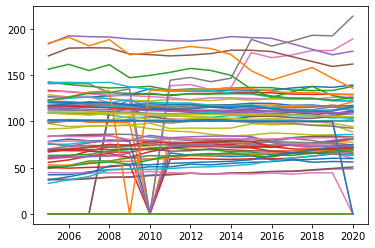

[[ 1.     0.259  0.134  0.511  0.137  0.148  0.41   0.292  0.078  0.019
   0.04   0.131  0.037  0.036 -0.399 -0.405 -0.216 -0.314  0.137  0.052
   0.238  0.247 -0.421 -0.406  0.009]
 [ 0.259  1.     0.712  0.624 -0.823 -0.813 -0.294 -0.456 -0.625 -0.737
  -0.876 -0.817 -0.893 -0.887  0.56   0.508  0.752  0.727  0.801  0.765
   0.592  0.615 -0.488 -0.379 -0.797]
 [ 0.134  0.712  1.     0.674 -0.657 -0.62  -0.721 -0.821 -0.482 -0.531
  -0.582 -0.482 -0.714 -0.708  0.414  0.556  0.809  0.692  0.588  0.625
   0.168  0.166 -0.361 -0.28  -0.733]
 [ 0.511  0.624  0.674  1.    -0.334 -0.339 -0.153 -0.33  -0.439 -0.441
  -0.3   -0.203 -0.456 -0.438 -0.084 -0.093  0.405  0.404  0.566  0.52
   0.065  0.086 -0.555 -0.448 -0.602]
 [ 0.137 -0.823 -0.657 -0.334  1.     0.995  0.556  0.625  0.744  0.865
   0.945  0.888  0.96   0.953 -0.857 -0.807 -0.798 -0.794 -0.61  -0.664
  -0.391 -0.409  0.112  0.001  0.683]
 [ 0.148 -0.813 -0.62  -0.339  0.995  1.     0.523  0.605  0.766  0.883
   0.94   0.892  0.

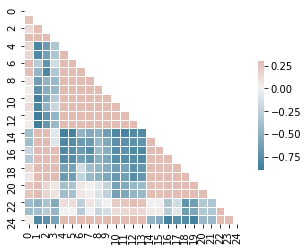

In [1]:

# SDG_1041_NOC_RT_A-filtered-2022-04-02
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# %%
def load_data():
    args = []
    prod_df = pd.read_csv('./data/productivity.csv')
    prod_new_df = pd.read_csv('./data/productivity_new.csv')
    sentiment_df = pd.read_csv('./data/sentiment.csv')
    hours_worked_df = pd.read_csv('./data/lfsa_ewhun2_1_Data.csv')
    productivity_df = pd.read_csv('./data/GDP_per_quarter.csv') 
    unem_df = pd.read_csv('./data/unem.csv')
    covid_df = pd.read_csv('./data/DataPerWeek.csv')
    unem_df.fillna(0)
    productivity_df.fillna(0)
    sentiment_df.fillna(0)
    prod_df.fillna(0)
    covid_df.fillna(0)
    args += [prod_df, sentiment_df, hours_worked_df, prod_new_df, productivity_df, unem_df, covid_df]
    return args

# %%
args = load_data()
prod_df, sentiment_df, hours_worked_df, prod_new_df, productivity_df, unem_df, covid_df = args
for i in np.linspace(2005, 2020, 16, endpoint=True):
    prod_df[[str(int(i))]] = prod_df[[str(int(i))]].apply(pd.to_numeric, errors="coerce")
print(prod_df.head(), sentiment_df.head(), hours_worked_df.head(), prod_new_df.head(), productivity_df.head(), unem_df.head(), covid_df.head())

#%%
prod_data = prod_df.iloc[0:71, 2:-1].replace(np.nan, 0).to_numpy(dtype = np.float64).T
time_data = np.repeat(np.array([np.linspace(2005, 2020, 16)]).transpose(), 71, 1)
plt.plot(time_data, prod_data)
plt.show()

#%%
corr = np.round(np.corrcoef(prod_df.iloc[0:25, 2:-1].replace(np.nan, 0).to_numpy(dtype = np.float16)), 3)
mask = np.triu(np.ones_like(corr, dtype=bool))
print(corr)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
#%%
prod_df.head(), productivity_df.head()

#%%
def load_df(file_name):
    df = pd.read_excel(file_name, sheet_name='Sheet 1')
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    df.replace(':', np.nan, inplace=True)
    df.index = df.iloc[:, 0]
    df.drop(df.columns[[0]], axis=1, inplace=True)
    for i in df.columns[:]:
        df[i] = df[i].apply(pd.to_numeric, errors="coerce")
    df.interpolate(method='linear', inplace=True, axis = 1)
    return df

def create_per_employeer(GDP_df, HW_df, employees_df):
    ''' This is a function to create a dataframe with the per-employee GDP and per hour worked '''
    cols =(list(set(GDP_df.columns) and set(employees_df.columns) and set(HW_df.columns)))
    cols.sort()
    idx = cols.pop()
    per_employee_df = pd.DataFrame(index=GDP_df.index, columns=cols)
    per_HW_df = pd.DataFrame(index=GDP_df.index, columns=cols)
    for i in cols:
        per_employee_df[i] = GDP_df[i]/employees_df[i]
        per_HW_df[i] = per_employee_df[i]/HW_df[i]
    return per_employee_df, per_HW_df

GDP_df =  load_df('./data/GDP_per_quarter_2.xlsx') * 1e6
HW_df = load_df('./data/hours_worked.xlsx')
employees_df = load_df('./data/Employees.xlsx') * 1e3
per_employee_df, per_HW_df = create_per_employeer(GDP_df, HW_df, employees_df)

In [2]:
per_HW_df

,2008-Q1,2008-Q2,2008-Q3,2008-Q4,2009-Q1,2009-Q2,2009-Q3,2009-Q4,2010-Q1,2010-Q2,...,2019-Q2,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3
TIME,,,,,,,,,,,,,,,,,,,,,
Belgium,611.402642,650.509000,611.189001,643.449734,609.283943,621.255617,609.988497,665.392445,616.821551,653.559524,...,781.186857,751.422297,826.953821,757.363015,697.283950,740.861798,818.986723,798.488287,832.346996,810.219452
Bulgaria,64.485616,73.585609,83.978307,84.170255,67.164116,78.884587,85.638898,89.906787,70.283027,83.692961,...,132.850213,140.475386,150.054807,120.599117,132.878265,150.262363,158.008789,129.145951,148.563718,169.056203
Czechia,213.788847,237.927883,249.455512,234.787323,200.832967,220.343577,232.028277,237.178025,219.683756,242.016209,...,327.919628,333.933911,343.652461,311.266007,294.832550,324.634480,335.597217,319.635254,358.684483,362.109816
Denmark,678.865532,702.741710,698.890381,719.966763,683.246776,694.388128,699.560334,749.470180,725.845460,758.798584,...,922.540572,899.795253,928.473043,906.720783,895.945101,924.479816,962.315027,906.093079,943.762778,936.824282
Germany (until 1990 former territory of the FRG),533.261691,537.787264,526.458031,525.027097,498.587068,498.165814,516.895246,521.901949,526.844000,530.364765,...,662.946576,670.291155,670.776516,653.168535,593.935393,661.429813,689.269713,671.321564,679.806980,704.338582
Estonia,171.701788,190.377468,182.534316,178.910157,164.867715,176.504979,169.971297,183.658263,175.466804,191.819752,...,330.497382,328.107378,339.227333,302.046534,315.120648,329.468547,347.572388,323.745433,362.060103,380.556094
Ireland,730.837838,712.962459,709.483959,717.768395,729.491893,737.183130,730.276180,725.745522,751.570211,748.128309,...,1195.186922,1296.389764,1293.331757,1306.859698,1236.788105,1436.662633,1338.430432,1476.221373,1412.989267,1531.442622
Greece,450.237773,475.350999,493.613691,494.032784,431.791418,479.375864,484.782423,510.227724,454.466483,467.887041,...,412.272885,439.291495,417.200137,376.636277,352.259744,396.261942,387.377776,397.830785,403.502943,439.779489
Spain,404.288417,428.318029,407.299761,448.923237,417.554579,441.016492,422.911119,459.404170,432.763968,454.549890,...,508.530716,485.840385,519.190295,470.499049,433.278550,470.792687,498.144841,469.709164,492.792130,472.956635


In [3]:
per_HW_df
per_HW_df.drop(index='Albania'  , inplace=True)
per_HW_df.drop(index='Bosnia and Herzegovina'  , inplace=True)
per_HW_df.drop(index='Kosovo (under United Nations Security Council Resolution 1244/99)', inplace=True)

per_HW_df

,2008-Q1,2008-Q2,2008-Q3,2008-Q4,2009-Q1,2009-Q2,2009-Q3,2009-Q4,2010-Q1,2010-Q2,...,2019-Q2,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3
TIME,,,,,,,,,,,,,,,,,,,,,
Belgium,611.402642,650.509000,611.189001,643.449734,609.283943,621.255617,609.988497,665.392445,616.821551,653.559524,...,781.186857,751.422297,826.953821,757.363015,697.283950,740.861798,818.986723,798.488287,832.346996,810.219452
Bulgaria,64.485616,73.585609,83.978307,84.170255,67.164116,78.884587,85.638898,89.906787,70.283027,83.692961,...,132.850213,140.475386,150.054807,120.599117,132.878265,150.262363,158.008789,129.145951,148.563718,169.056203
Czechia,213.788847,237.927883,249.455512,234.787323,200.832967,220.343577,232.028277,237.178025,219.683756,242.016209,...,327.919628,333.933911,343.652461,311.266007,294.832550,324.634480,335.597217,319.635254,358.684483,362.109816
Denmark,678.865532,702.741710,698.890381,719.966763,683.246776,694.388128,699.560334,749.470180,725.845460,758.798584,...,922.540572,899.795253,928.473043,906.720783,895.945101,924.479816,962.315027,906.093079,943.762778,936.824282
Germany (until 1990 former territory of the FRG),533.261691,537.787264,526.458031,525.027097,498.587068,498.165814,516.895246,521.901949,526.844000,530.364765,...,662.946576,670.291155,670.776516,653.168535,593.935393,661.429813,689.269713,671.321564,679.806980,704.338582
Estonia,171.701788,190.377468,182.534316,178.910157,164.867715,176.504979,169.971297,183.658263,175.466804,191.819752,...,330.497382,328.107378,339.227333,302.046534,315.120648,329.468547,347.572388,323.745433,362.060103,380.556094
Ireland,730.837838,712.962459,709.483959,717.768395,729.491893,737.183130,730.276180,725.745522,751.570211,748.128309,...,1195.186922,1296.389764,1293.331757,1306.859698,1236.788105,1436.662633,1338.430432,1476.221373,1412.989267,1531.442622
Greece,450.237773,475.350999,493.613691,494.032784,431.791418,479.375864,484.782423,510.227724,454.466483,467.887041,...,412.272885,439.291495,417.200137,376.636277,352.259744,396.261942,387.377776,397.830785,403.502943,439.779489
Spain,404.288417,428.318029,407.299761,448.923237,417.554579,441.016492,422.911119,459.404170,432.763968,454.549890,...,508.530716,485.840385,519.190295,470.499049,433.278550,470.792687,498.144841,469.709164,492.792130,472.956635


In [15]:
per_HW_df = per_HW_df.rename(index={'Germany (until 1990 former territory of the FRG)': 'Germany'})
per_HW_df
per_HW_df['Average'] = per_HW_df.iloc[:,:12].mean(axis=1, skipna=True)
per_HW_df


,2008-Q1,2008-Q2,2008-Q3,2008-Q4,2009-Q1,2009-Q2,2009-Q3,2009-Q4,2010-Q1,2010-Q2,...,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,Average
TIME,,,,,,,,,,,,,,,,,,,,,
Belgium,611.402642,650.509000,611.189001,643.449734,609.283943,621.255617,609.988497,665.392445,616.821551,653.559524,...,751.422297,826.953821,757.363015,697.283950,740.861798,818.986723,798.488287,832.346996,810.219452,632.735292
Bulgaria,64.485616,73.585609,83.978307,84.170255,67.164116,78.884587,85.638898,89.906787,70.283027,83.692961,...,140.475386,150.054807,120.599117,132.878265,150.262363,158.008789,129.145951,148.563718,169.056203,81.429099
Czechia,213.788847,237.927883,249.455512,234.787323,200.832967,220.343577,232.028277,237.178025,219.683756,242.016209,...,333.933911,343.652461,311.266007,294.832550,324.634480,335.597217,319.635254,358.684483,362.109816,232.553866
Denmark,678.865532,702.741710,698.890381,719.966763,683.246776,694.388128,699.560334,749.470180,725.845460,758.798584,...,899.795253,928.473043,906.720783,895.945101,924.479816,962.315027,906.093079,943.762778,936.824282,720.960773
Germany,533.261691,537.787264,526.458031,525.027097,498.587068,498.165814,516.895246,521.901949,526.844000,530.364765,...,670.291155,670.776516,653.168535,593.935393,661.429813,689.269713,671.321564,679.806980,704.338582,526.547870
Estonia,171.701788,190.377468,182.534316,178.910157,164.867715,176.504979,169.971297,183.658263,175.466804,191.819752,...,328.107378,339.227333,302.046534,315.120648,329.468547,347.572388,323.745433,362.060103,380.556094,181.284794
Ireland,730.837838,712.962459,709.483959,717.768395,729.491893,737.183130,730.276180,725.745522,751.570211,748.128309,...,1296.389764,1293.331757,1306.859698,1236.788105,1436.662633,1338.430432,1476.221373,1412.989267,1531.442622,735.369611
Greece,450.237773,475.350999,493.613691,494.032784,431.791418,479.375864,484.782423,510.227724,454.466483,467.887041,...,439.291495,417.200137,376.636277,352.259744,396.261942,387.377776,397.830785,403.502943,439.779489,475.549315
Spain,404.288417,428.318029,407.299761,448.923237,417.554579,441.016492,422.911119,459.404170,432.763968,454.549890,...,485.840385,519.190295,470.499049,433.278550,470.792687,498.144841,469.709164,492.792130,472.956635,434.731622


In [16]:
wages = pd.read_csv(r'/home/katia/Downloads/datasets/SDG_1041_NOC_RT_A-filtered-2022-04-02.csv')
wages = wages[['ref_area.label','time','obs_value' ]]
#prod = prod[['geo', 'TIME_PERIOD','OBS_VALUE']]
wages = wages.pivot_table('obs_value', index = ['ref_area.label'],columns = ['time'] )
# df_education.drop(index='Austria'  , inplace=True)
# df_education
wages

time,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
ref_area.label,,,,,,,,,,,,
Austria,57.02,59.43,58.54,57.44,57.95,57.94,60.74,58.93,61.03,60.17,58.31,59.24
Belgium,65.43,66.10,65.18,65.69,66.35,67.32,64.71,63.85,62.53,61.61,61.55,61.86
Bulgaria,41.48,43.26,44.28,42.52,45.64,50.02,50.59,50.65,51.35,53.01,51.98,51.73
Croatia,59.68,61.96,60.98,59.85,59.29,58.40,56.56,58.31,55.98,54.83,57.38,57.82
Cyprus,55.27,58.37,57.14,57.52,56.14,53.98,51.98,49.57,48.09,48.44,49.16,49.74
Czechia,52.51,53.28,54.24,53.44,54.93,53.92,53.35,51.66,52.57,54.82,56.32,56.43
Denmark,61.04,63.48,59.94,60.84,59.80,59.30,58.75,58.57,58.01,56.69,56.46,56.19
Estonia,56.15,55.91,52.02,50.74,51.34,52.46,54.10,56.48,54.59,56.73,56.99,58.34
Finland,57.93,61.42,59.53,58.66,58.48,58.14,57.15,57.61,55.81,53.94,54.22,54.57


In [17]:
wages['Average'] = wages.iloc[:,:12].mean(axis=1, skipna=True)
wages

time,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Average
ref_area.label,,,,,,,,,,,,,
Austria,57.02,59.43,58.54,57.44,57.95,57.94,60.74,58.93,61.03,60.17,58.31,59.24,58.895000
Belgium,65.43,66.10,65.18,65.69,66.35,67.32,64.71,63.85,62.53,61.61,61.55,61.86,64.348333
Bulgaria,41.48,43.26,44.28,42.52,45.64,50.02,50.59,50.65,51.35,53.01,51.98,51.73,48.042500
Croatia,59.68,61.96,60.98,59.85,59.29,58.40,56.56,58.31,55.98,54.83,57.38,57.82,58.420000
Cyprus,55.27,58.37,57.14,57.52,56.14,53.98,51.98,49.57,48.09,48.44,49.16,49.74,52.950000
Czechia,52.51,53.28,54.24,53.44,54.93,53.92,53.35,51.66,52.57,54.82,56.32,56.43,53.955833
Denmark,61.04,63.48,59.94,60.84,59.80,59.30,58.75,58.57,58.01,56.69,56.46,56.19,59.089167
Estonia,56.15,55.91,52.02,50.74,51.34,52.46,54.10,56.48,54.59,56.73,56.99,58.34,54.654167
Finland,57.93,61.42,59.53,58.66,58.48,58.14,57.15,57.61,55.81,53.94,54.22,54.57,57.288333


In [19]:
df = wages[['Average']]
df['Average GDP'] = per_HW_df['Average']

df

<ipython-input-19-48281f8267bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average GDP'] = per_HW_df['Average']


time,Average,Average GDP
ref_area.label,,
Austria,58.895000,559.852053
Belgium,64.348333,632.735292
Bulgaria,48.042500,81.429099
Croatia,58.420000,210.461610
Cyprus,52.950000,383.191797
Czechia,53.955833,232.553866
Denmark,59.089167,720.960773
Estonia,54.654167,181.284794
Finland,57.288333,589.136949


In [20]:
df.corr()

time,Average,Average GDP
time,,
Average,1.000000,0.456056
Average GDP,0.456056,1.000000
